In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import math
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms
import seaborn as sns
import matplotlib
from sklearn.preprocessing import Binarizer
import sklearn
import math
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df1=pd.read_csv(r"C:\Users\SaurabhM\Desktop\data2\train.csv")
df2=pd.read_csv(r"C:\Users\SaurabhM\Desktop\data2\test.csv")

In [3]:
df1.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

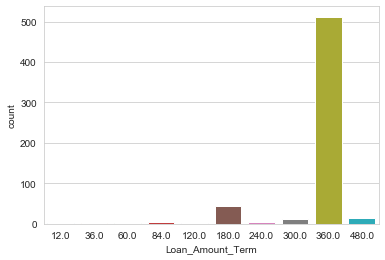

In [4]:
sns.set_style("whitegrid")
sns.countplot(x="Loan_Amount_Term",data=df1)

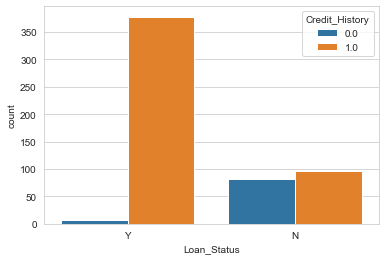

In [5]:
sns.countplot(x="Loan_Status",hue="Credit_History",data=df1)

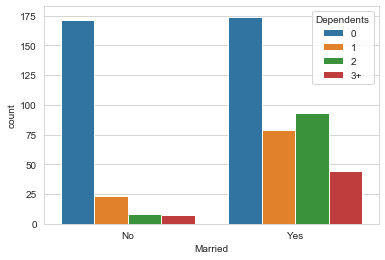

In [6]:
sns.countplot(x="Married",hue="Dependents",data=df1)

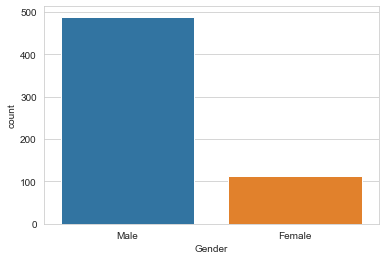

In [7]:
sns.set_style("whitegrid")
sns.countplot(x="Gender",data=df1)

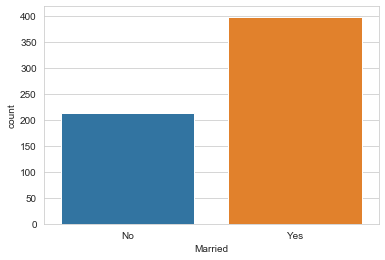

In [8]:
sns.set_style("whitegrid")
sns.countplot(x="Married",data=df1)

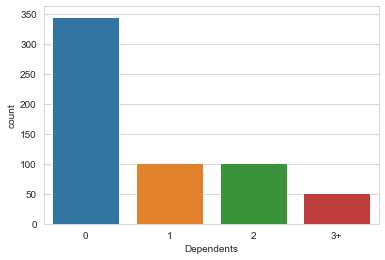

In [9]:
sns.set_style("whitegrid")
sns.countplot(x="Dependents",data=df1)

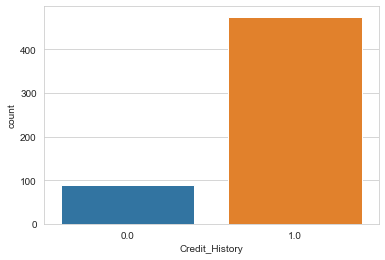

In [10]:
sns.set_style("whitegrid")
sns.countplot(x="Credit_History",data=df1)

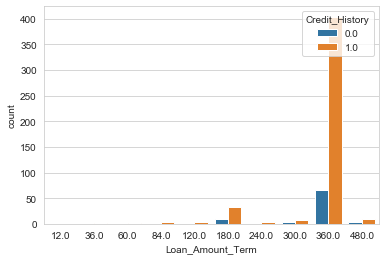

In [11]:
sns.countplot(x="Loan_Amount_Term",hue="Credit_History",data=df1)

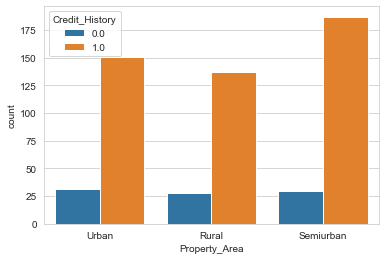

In [12]:
sns.countplot(x="Property_Area",hue="Credit_History",data=df1)

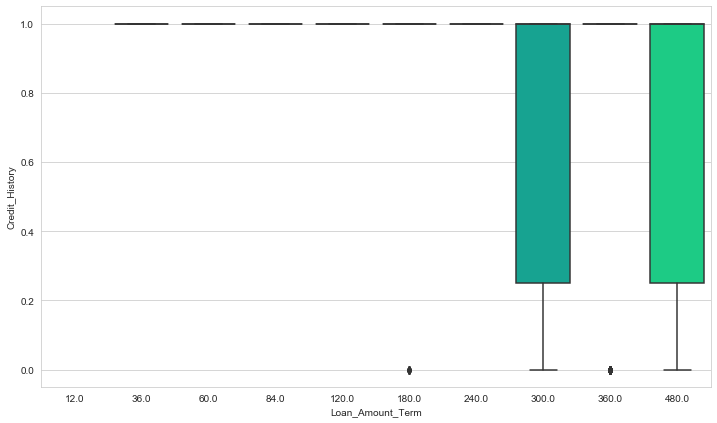

In [13]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Loan_Amount_Term',y="Credit_History",data=df1,palette='winter')

In [14]:
a=df1[df1["Loan_Amount_Term"]<180]

In [15]:
a["Credit_History"].value_counts()

1.0    10
Name: Credit_History, dtype: int64

In [16]:
b=df1[df1["Credit_History"].isna()]

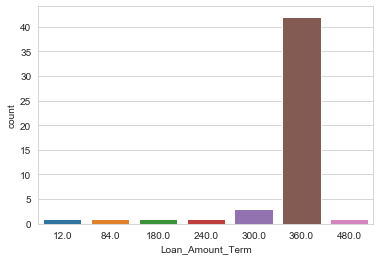

In [17]:
sns.set_style("whitegrid")
sns.countplot(x="Loan_Amount_Term",data=b)

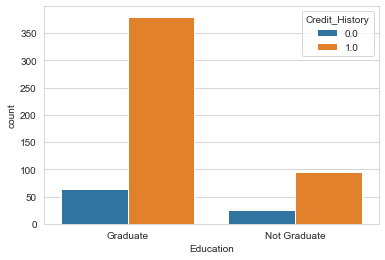

In [18]:
sns.countplot(x="Education",hue="Credit_History",data=df1)

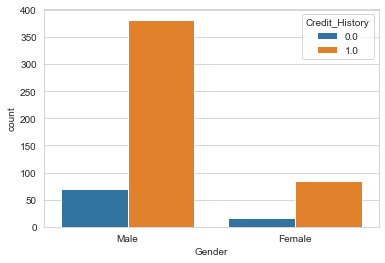

In [19]:
sns.countplot(x="Gender",hue="Credit_History",data=df1)

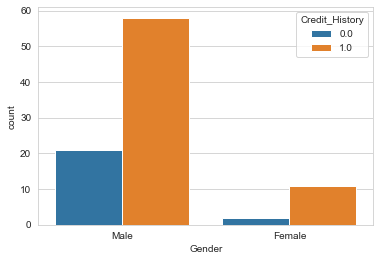

In [20]:
xx=df1[df1["Loan_Amount_Term"]!=360]["Gender"]
sns.countplot(x=xx,hue="Credit_History",data=df1)

In [21]:
a=df1["LoanAmount"].median()
df1["LoanAmount"].replace({np.nan:a},inplace=True)
a=df1["Loan_Amount_Term"].median()
df1["Loan_Amount_Term"].replace({np.nan:a},inplace=True)

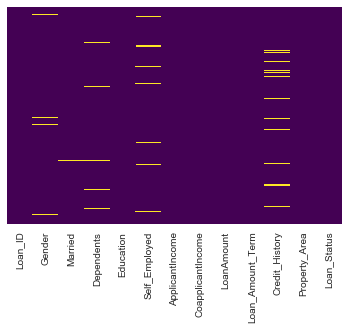

In [22]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

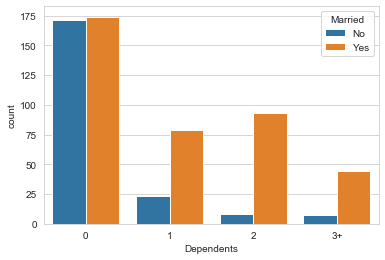

In [23]:
sns.countplot(x="Dependents",hue="Married",data=df1)

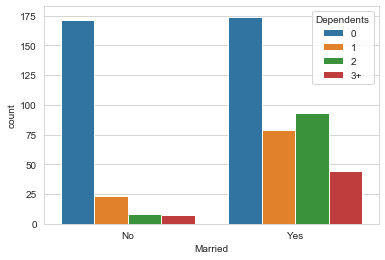

In [24]:
sns.countplot(x="Married",hue="Dependents",data=df1)

In [25]:
 #Using lambda funstion
def impute_dep(cols):
    Dependents = cols[0]
    Married = cols[1]
    
    if pd.isnull(Dependents):

        if Married == "Yes":
            return 2

        elif Married == "No":
            return 0

        else:
            return 0

    else:
        if Dependents=="0":
            return 0
        elif Dependents=="1":
            return 1
        elif Dependents=="2":
            return 2
        elif Dependents=="3+":
            return 3
        else:
            return Dependents


df1['Dependents'] = df1[['Dependents','Married']].apply(impute_dep,axis=1)

In [26]:
 #Using lambda funstion
def impute_mar(cols):
    Married = cols[0]
    Dependents = cols[1]
    
    if pd.isnull(Married):

        if Dependents == 0:
            return "No"
        
        else:
            return "Yes"
        
    else:
        return Married


df1['Married'] = df1[['Married','Dependents']].apply(impute_mar,axis=1)

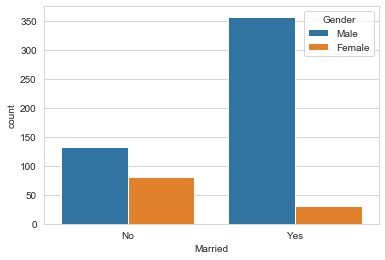

In [27]:
sns.countplot(x="Married",hue="Gender",data=df1)

In [28]:
df2.isnull().sum().sort_values(ascending=False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Married               0
Loan_ID               0
dtype: int64

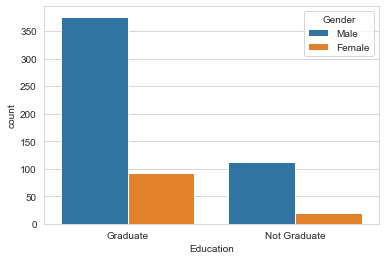

In [29]:
sns.countplot(x="Education",hue="Gender",data=df1)

In [30]:
df1["Gender"].replace({np.nan:"Male"},inplace=True)#Feminist don't kill me


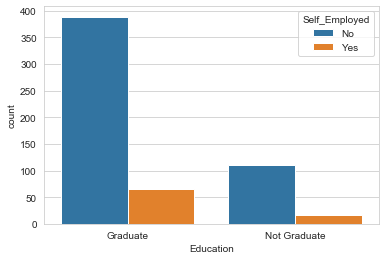

In [31]:
sns.countplot(x="Education",hue="Self_Employed",data=df1)

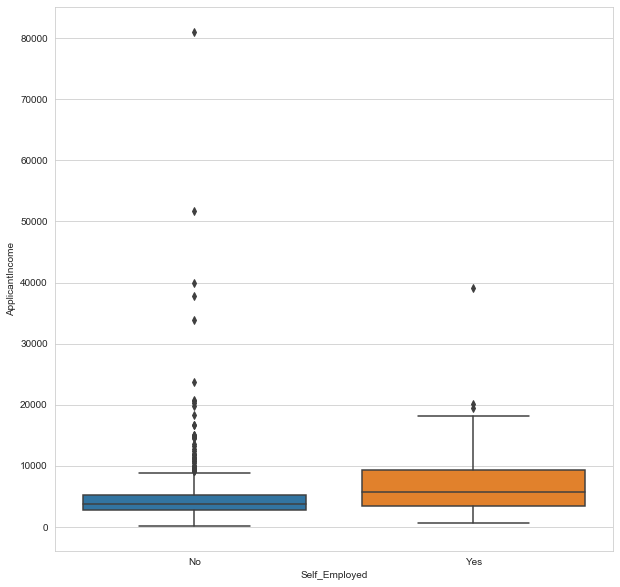

In [32]:
plt.figure(figsize=(10,10))
sns.boxplot(x=df1["Self_Employed"],y=df1["ApplicantIncome"])
plt.show()

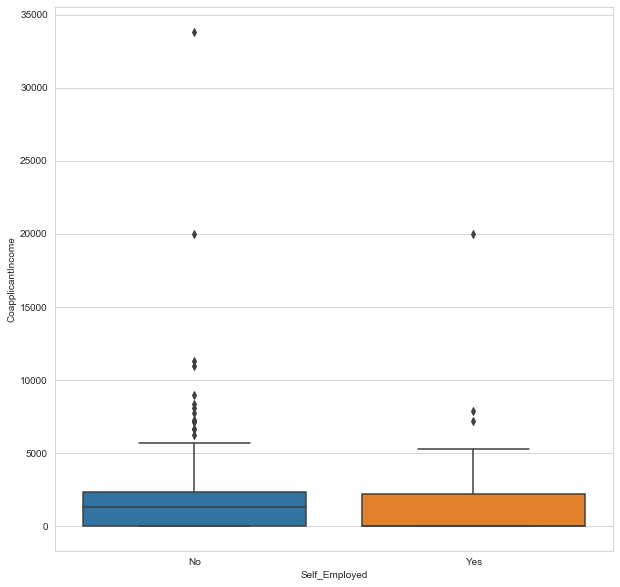

In [33]:
plt.figure(figsize=(10,10))
sns.boxplot(x=df1["Self_Employed"],y=df1["CoapplicantIncome"])
plt.show()

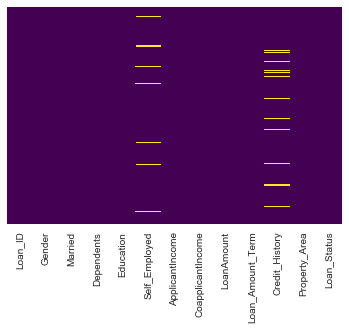

In [34]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [35]:
a=df1[df1["ApplicantIncome"]>00000][["ApplicantIncome","Self_Employed"]]
a.shape

(614, 2)

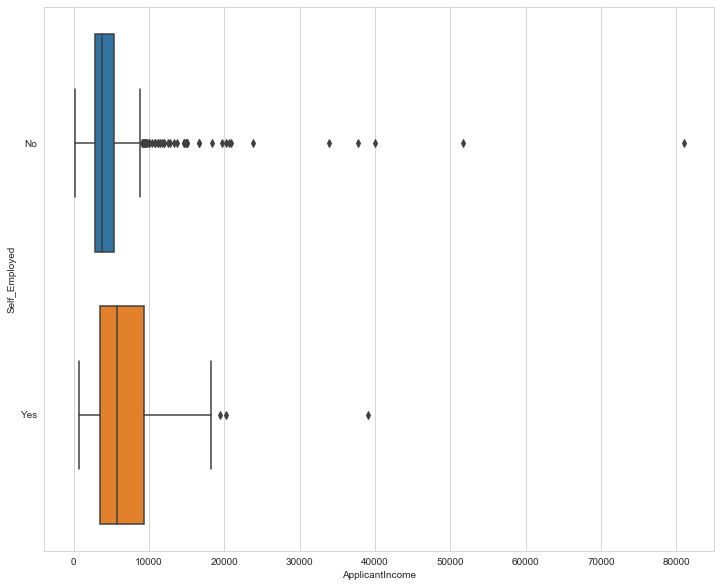

In [36]:
plt.figure(figsize=(12,10))
sns.boxplot(x=a["ApplicantIncome"],y=a["Self_Employed"])

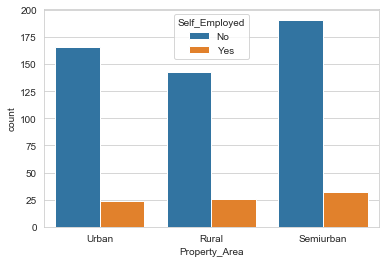

In [37]:
sns.countplot(x="Property_Area",hue="Self_Employed",data=df1)

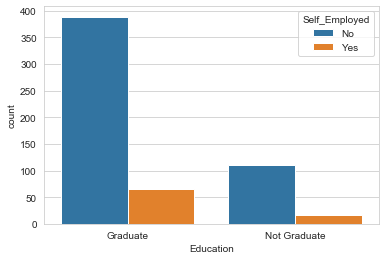

In [38]:
sns.countplot(x="Education",hue="Self_Employed",data=df1)

In [39]:
df1["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

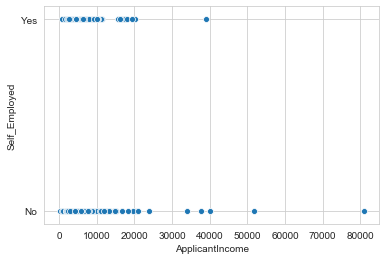

In [40]:
sns.scatterplot(x=df1["ApplicantIncome"],y=df1["Self_Employed"])

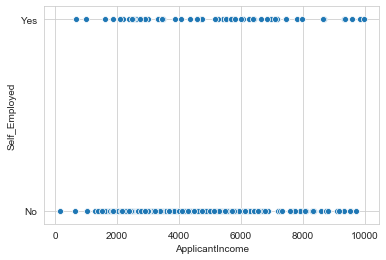

In [41]:
a=df1[df1["ApplicantIncome"]<10000][["ApplicantIncome","Self_Employed"]]
sns.scatterplot(x=a["ApplicantIncome"],y=a["Self_Employed"])

In [42]:
a["Self_Employed"].value_counts()

No     464
Yes     65
Name: Self_Employed, dtype: int64

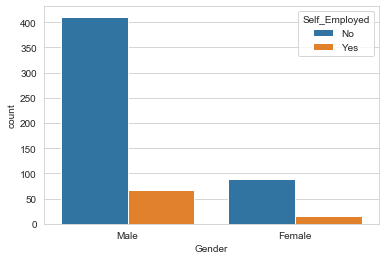

In [43]:
sns.countplot(x="Gender",hue="Self_Employed",data=df1)

In [44]:
a=df1[df1["Gender"]=="Female"][["ApplicantIncome","CoapplicantIncome","Self_Employed"]]

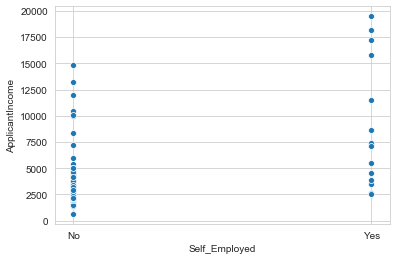

In [45]:
sns.scatterplot(y=a["ApplicantIncome"],x=a["Self_Employed"])

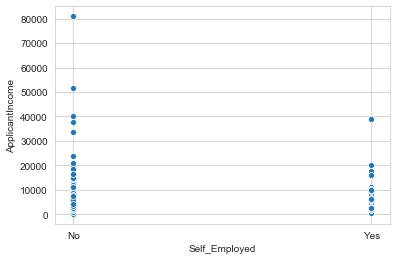

In [46]:
a=df1[df1["Gender"]=="Male"][["ApplicantIncome","CoapplicantIncome","Self_Employed"]]
sns.scatterplot(y=a["ApplicantIncome"],x=a["Self_Employed"])

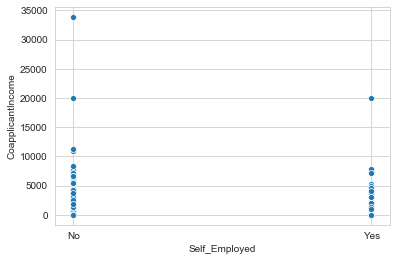

In [47]:
a=df1[df1["Gender"]=="Male"][["ApplicantIncome","CoapplicantIncome","Self_Employed"]]
sns.scatterplot(y=a["CoapplicantIncome"],x=a["Self_Employed"])

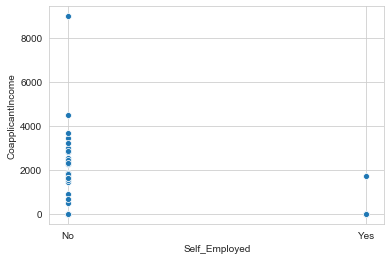

In [48]:
a=df1[df1["Gender"]=="Female"][["ApplicantIncome","CoapplicantIncome","Self_Employed"]]
sns.scatterplot(y=a["CoapplicantIncome"],x=a["Self_Employed"])

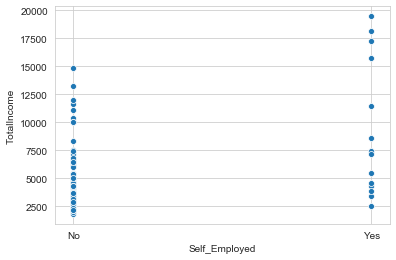

In [49]:
a=df1[df1["Gender"]=="Female"][["ApplicantIncome","CoapplicantIncome","Self_Employed"]]
a["TotalIncome"]=a["ApplicantIncome"]+a["CoapplicantIncome"]
sns.scatterplot(y=a["TotalIncome"],x=a["Self_Employed"])

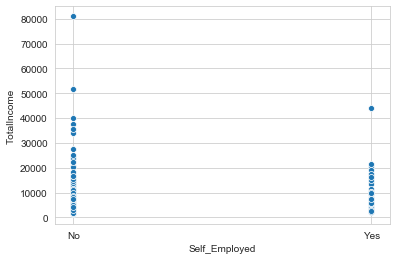

In [50]:
a=df1[df1["Gender"]=="Male"][["ApplicantIncome","CoapplicantIncome","Self_Employed"]]
a["TotalIncome"]=a["ApplicantIncome"]+a["CoapplicantIncome"]
sns.scatterplot(y=a["TotalIncome"],x=a["Self_Employed"])

In [51]:
#Using lambda funstion
def impute_dep(cols):
    ApplicantIncome = cols[0]
    CoapplicantIncome = cols[1]
    Gender=cols[2]
    Self_Employed=cols[3]
        
    if pd.isnull(Self_Employed):

        if Gender == "Female":
            if CoapplicantIncome>0:
                return "No"
            elif ApplicantIncome >=15000:
                return "Yes"
            else:
                return "No"
            
        else:
            return "No"
 
    else:
        return Self_Employed


df1['Self_Employed'] = df1[['ApplicantIncome','CoapplicantIncome',"Gender","Self_Employed"]].apply(impute_dep,axis=1)


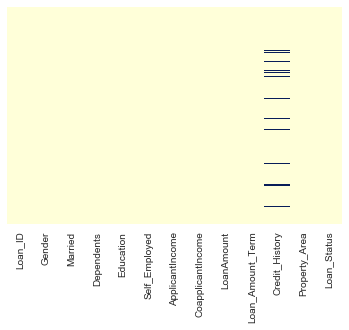

In [52]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [53]:
df1.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

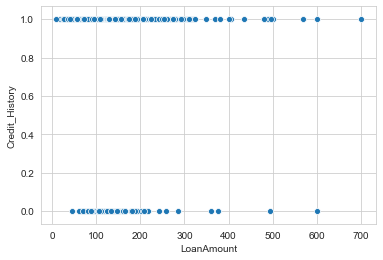

In [54]:
sns.scatterplot(x=df1["LoanAmount"],y=df1["Credit_History"])

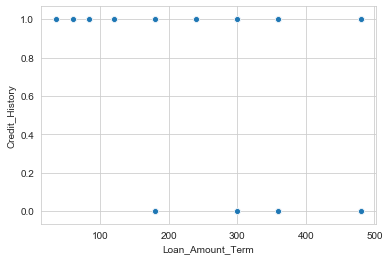

In [55]:
sns.scatterplot(x=df1["Loan_Amount_Term"],y=df1["Credit_History"])

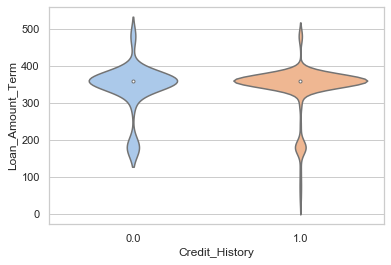

In [56]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
# Draw a nested violinplot and split the violins for easier comparison
ax = sns.violinplot(y="Loan_Amount_Term", x="Credit_History", data=df1)

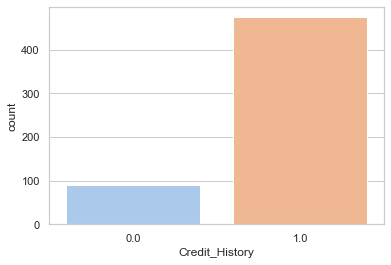

In [57]:
sns.countplot(x="Credit_History",data=df1)

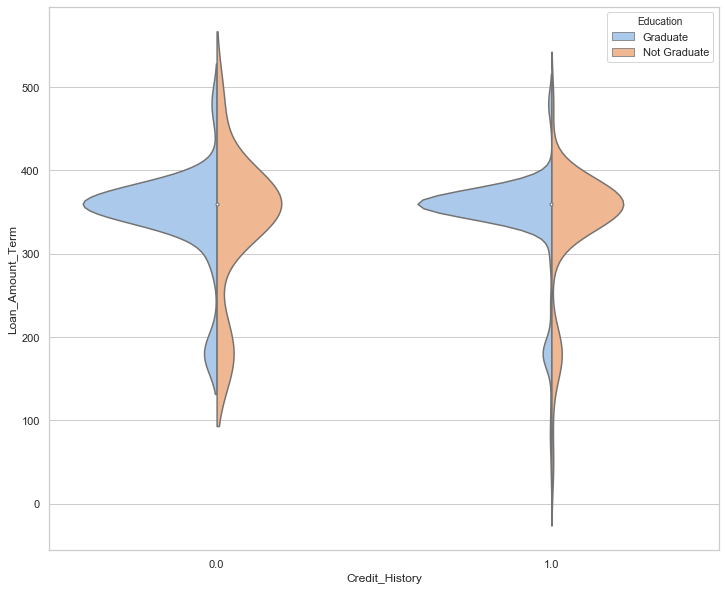

In [58]:
plt.figure(figsize=(12,10))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
# Draw a nested violinplot and split the violins for easier comparison
ax = sns.violinplot(y="Loan_Amount_Term", x="Credit_History",hue="Education" ,data=df1,split=True)

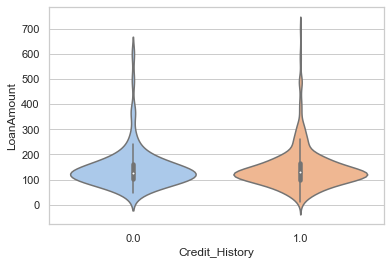

In [59]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
# Draw a nested violinplot and split the violins for easier comparison
ax = sns.violinplot(y="LoanAmount", x="Credit_History", data=df1)

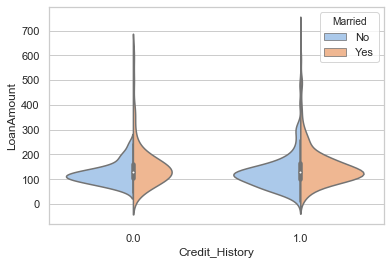

In [60]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
# Draw a nested violinplot and split the violins for easier comparison
ax = sns.violinplot(y="LoanAmount", x="Credit_History", data=df1,hue="Married",split=True)

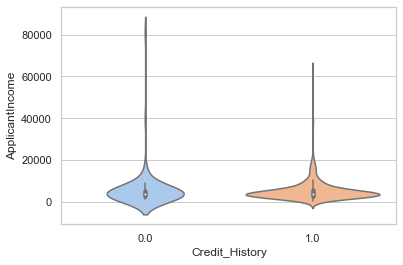

In [61]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
# Draw a nested violinplot and split the violins for easier comparison
ax = sns.violinplot(y="ApplicantIncome", x="Credit_History", data=df1)

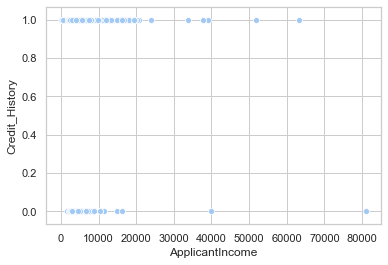

In [62]:
sns.scatterplot(x=df1["ApplicantIncome"],y=df1["Credit_History"])

In [63]:
df1["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [64]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [65]:
a=df1[df1["Credit_History"].isna()]

In [66]:
a.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
24,LP001052,Male,Yes,1,Graduate,No,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,LP001091,Male,Yes,1,Graduate,No,4166,3369.0,201.0,360.0,NaN,Urban,N
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,LP001264,Male,Yes,3,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y


In [67]:
df1.Credit_History.replace({np.nan:1.0},inplace=True)

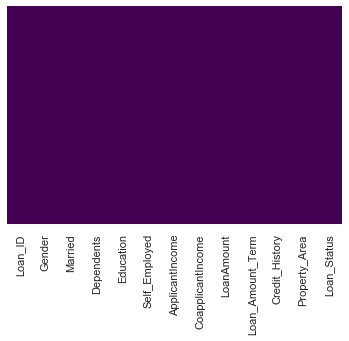

In [68]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [69]:
df1.Gender.replace({"Male":1,"Female":0},inplace=True)
df1.Married.replace({"Yes":1,"No":0},inplace=True)
df1.Education.replace({"Graduate":1,"Not Graduate":0},inplace=True)
df1.Self_Employed.replace({"Yes":1,"No":0},inplace=True)
df1.Property_Area.replace({"Semiurban":1,"Urban":2,"Rural":3},inplace=True)
df1.Loan_Status.replace({"Y":1,"N":0},inplace=True)
df1=df1.drop(["Loan_ID"],axis=1)